In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv", sep=",", encoding='utf-8')

print(len(df))

prediabetics = df[ df['Diabetes_012'] == 1 ].index 

df.drop(prediabetics, inplace=True) 

print(len(df))
df

253680
249049


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
X = df.drop('Diabetes_012',axis=1)
y = df['Diabetes_012']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=y)

print("Train Data: {}".format(X_train.shape))
pd.DataFrame(X_train).head()

Train Data: (224144, 21)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
204666,1.0,1.0,1.0,33.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,5.0,5.0
13380,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
126600,0.0,0.0,1.0,65.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,4.0,30.0,30.0,1.0,1.0,6.0,5.0,2.0
61815,1.0,1.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,5.0,8.0
84195,0.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,4.0,20.0,15.0,0.0,0.0,7.0,3.0,2.0


In [5]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [6]:
pd.DataFrame(scaled_X_train).head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.161825,1.173285,0.198087,0.705675,1.121734,-0.205392,-0.321106,0.565157,0.758533,0.481165,...,0.226403,-0.301479,0.464234,-0.428314,-0.484545,-0.446938,-0.887502,-0.331991,-0.057417,-0.516078
1,-0.860715,-0.852308,0.198087,-0.505880,-0.891477,-0.205392,-0.321106,0.565157,0.758533,0.481165,...,0.226403,-0.301479,-1.408410,-0.428314,-0.484545,-0.446938,1.126758,-0.659158,0.959943,0.936242
2,-0.860715,-0.852308,0.198087,5.551895,-0.891477,-0.205392,-0.321106,0.565157,0.758533,0.481165,...,0.226403,3.316980,1.400557,3.639231,2.970604,2.237446,1.126758,-0.659158,-0.057417,-1.968399


In [11]:
model = tree.DecisionTreeClassifier()
model = model.fit(scaled_X_train, y_train)
pred = model.predict(scaled_X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88     21370
         2.0       0.31      0.33      0.32      3535

    accuracy                           0.80     24905
   macro avg       0.60      0.61      0.60     24905
weighted avg       0.81      0.80      0.80     24905



In [12]:
matrix = confusion_matrix(y_test, pred)
matrix

array([[18713,  2657],
       [ 2352,  1183]])

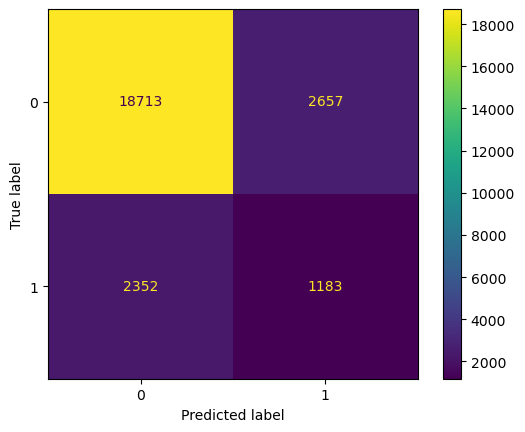

In [14]:
confusion_display = ConfusionMatrixDisplay(confusion_matrix=matrix)
confusion_display.plot()

plt.show()